# **Задание 1.**
- Визуализируйте распределение количественных переменных (возраст, уровень холестерина) с помощью box plot и гистограмм.
- Постройте столбчатые диаграммы для анализа распределения категориальных переменных (пол, тип боли в груди).

### Загрузка библиотек

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

### Информация о наборе данных:
- age: Возраст пациента
- sex: Пол пациента (0: женщина, 1: мужчина).
- cp: Тип боли в груди.
  - 0: Типичная стенокардия
  - 1: Атипичная стенокардия
  - 2: Боль, не связанная со стенокардией
  - 3: Бессимптомная
- trestbps: Артериальное давление в состоянии покоя.
- slope: Наклон верхней части первого сегмента упражнения:
  - 0: Подъем
  - 1: Пологий
  - 2: Спуск
- chol: холестерин в сыворотке крови.
- ca : Количество крупных сосудов (0-4), окрашенных при рентгеноскопии
- fbs: Уровень сахара в крови натощак > 120 мг/дл.
- restecg: Результаты электрокардиографии в состоянии покоя.
- thal: Результат нагрузочного теста на таллий:
  - 0: В норме
  - 1: Исправленный дефект
  - 2: Обратимый дефект
  - 3: Не описано
- thalach: Достигнута максимальная частота сердечных сокращений.
- exang: Стенокардия, вызванная физической нагрузкой.
(1 = yes, 0 = no)
- oldpeak: снижение уровня ST, вызванное физической нагрузкой по сравнению с отдыхом.
- target: Статус сердечно-сосудистых заболеваний (0 = отсутствие заболевания, 1 = наличие заболевания)

###Первичный анализ

In [ ]:
# Загрузим датасет
df_heart = pd.read_csv('/content/Доп. материал_Задание_ 1_heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- Данные не содержат пропущенных значений, что свидетельствует о хорошем качестве сбора.

In [ ]:
# Создадим списки категориальных и количественных переменных.

categorical_list = [i for i in df_heart.columns if len(df_heart[i].value_counts()) <= 5]
num_list = [i for i in df_heart.columns if len(df_heart[i].value_counts()) > 5]

categorical_list, num_list

(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'],
 ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

In [ ]:
# Приведение типов данных.

df_heart[categorical_list] = df_heart[categorical_list].apply(lambda col: col.astype(object))

df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 33.3+ KB


### Визуализация количественных переменных.

In [ ]:
df_heart[num_list].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


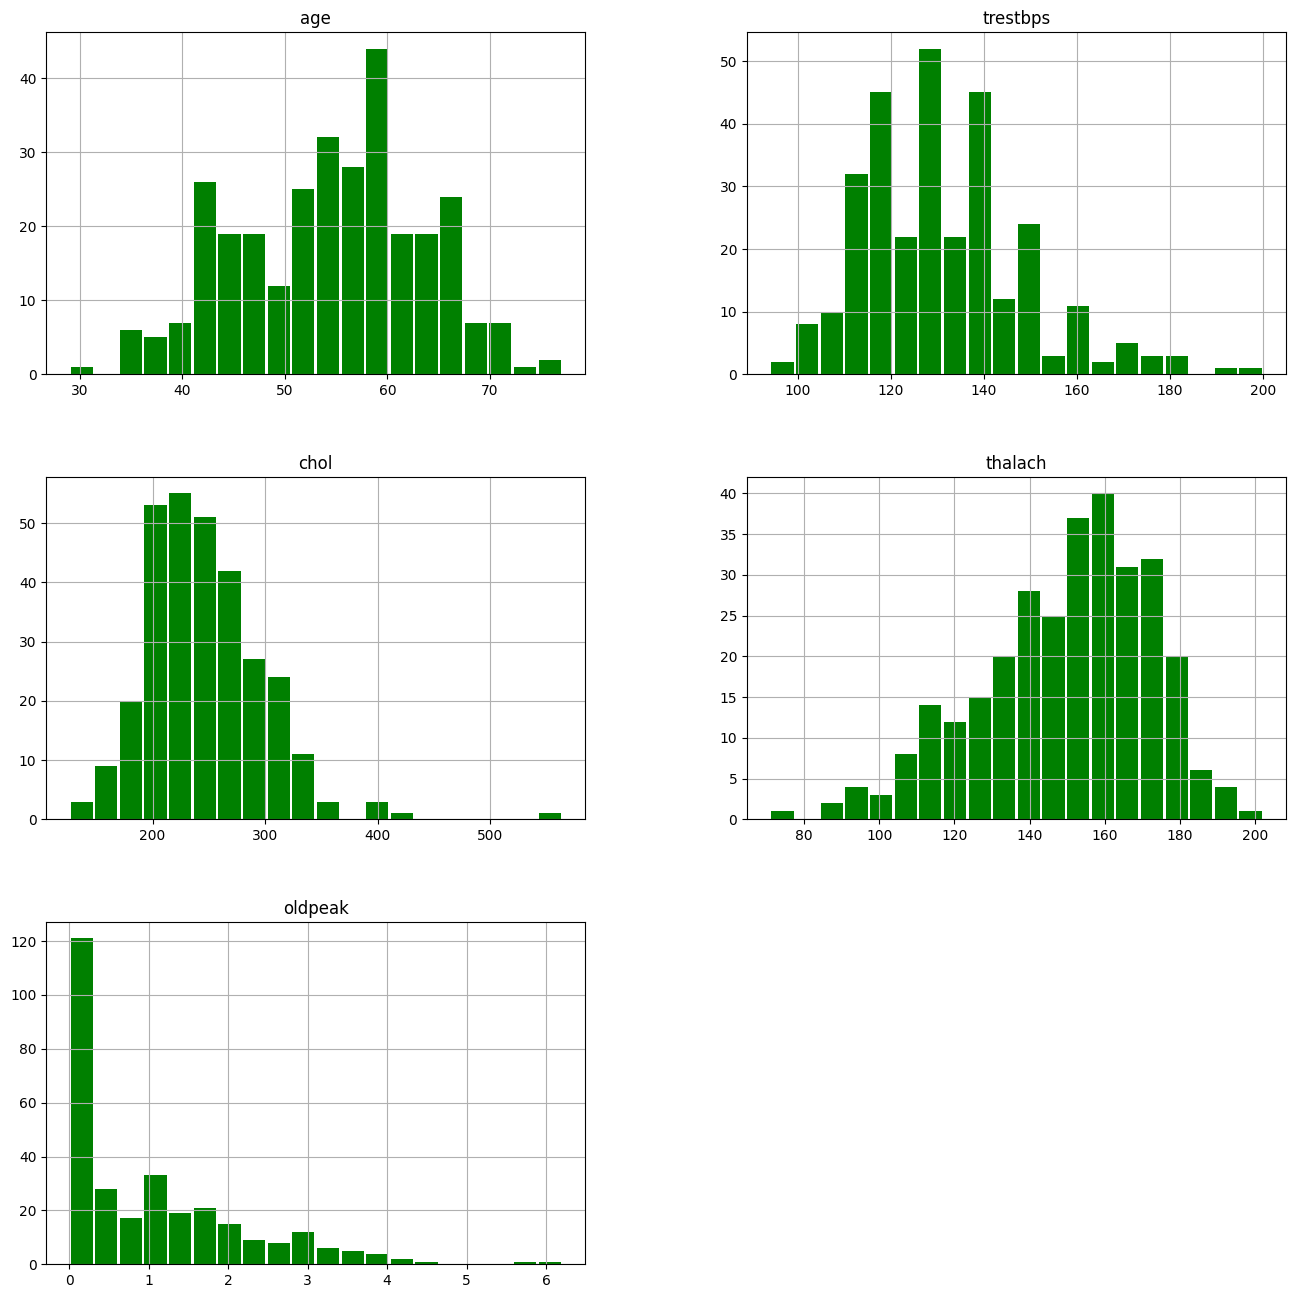

In [ ]:
# Визуализируем количественные переменные с помощью гистограмм.

df_heart[num_list].hist(figsize=(16,16), bins=20, rwidth= .9, grid=True, color='green');


- отмечается незначительное количество выбросов в переменных oldpeak, chol
- распределение большей части переменных близко к нормальному, oldpeak- смещено вправо

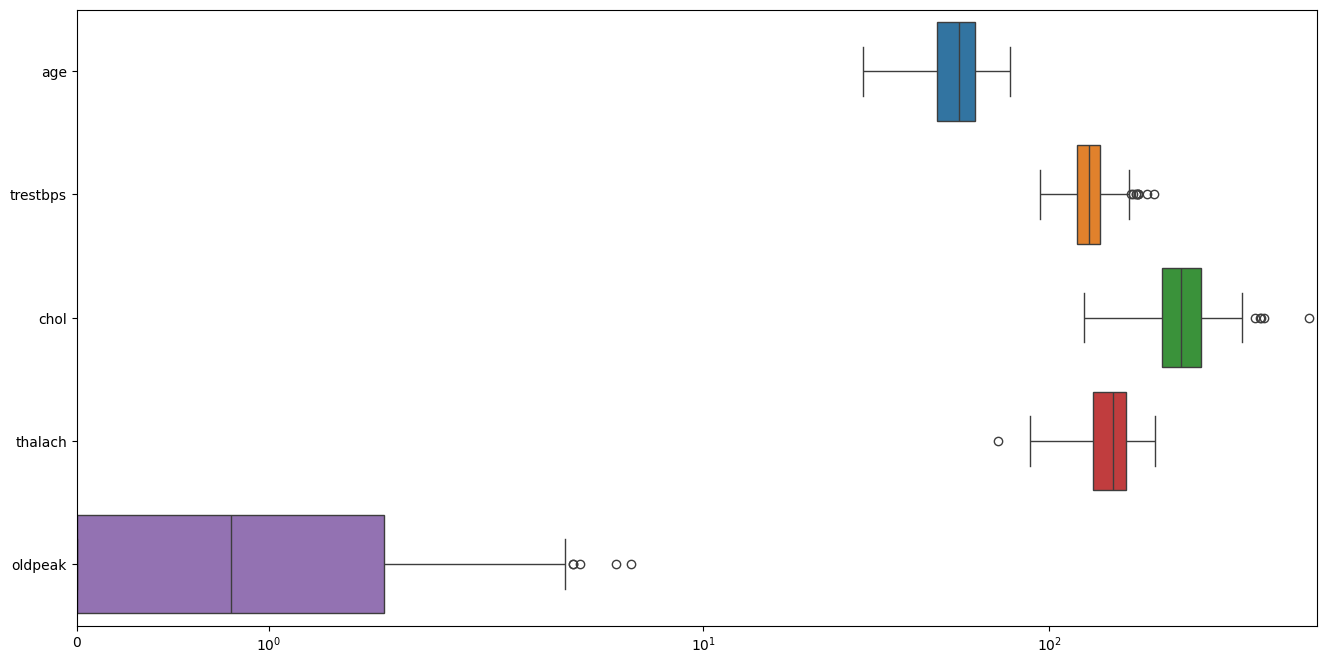

In [ ]:
# Визуализируем количественные переменные с помощью box plot.

plt.figure(figsize=(16, 8))
sns.boxplot(data=df_heart[num_list], orient='h')
plt.xscale('symlog')
plt.xlim(left=0)
plt.show()

Text(0, 0.5, 'Значение')

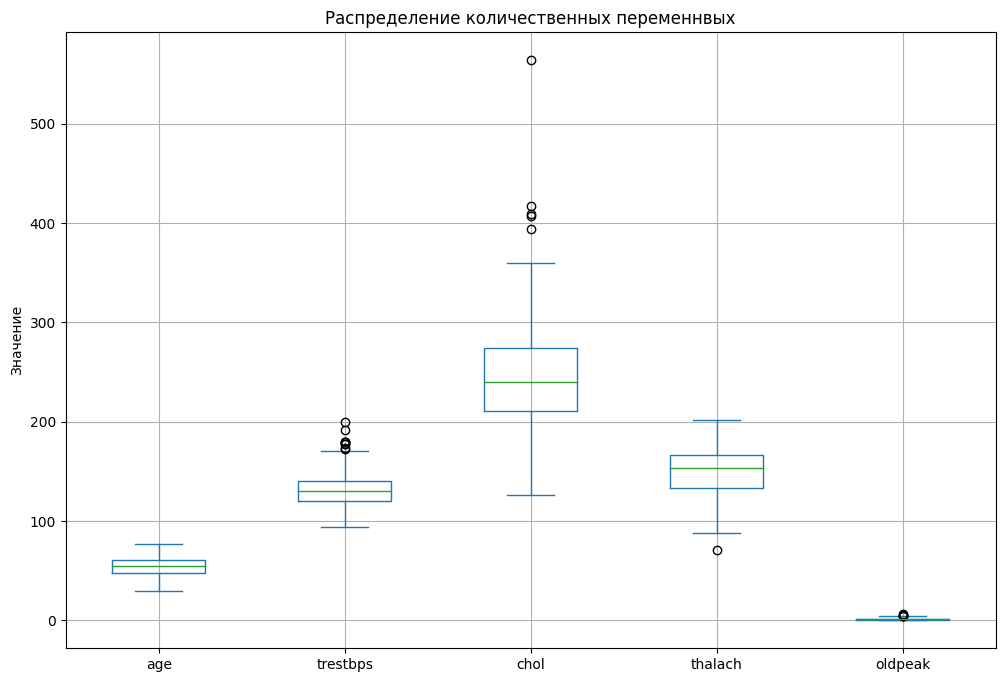

In [ ]:
df_heart[num_list].plot(kind='box', figsize=(12, 8), grid=True);
plt.title('Распределение количественных переменнвых')
plt.ylabel('Значение')

In [ ]:
for i in num_list:
   print (f'{i} : cреднее - {df_heart[i].mean()}, min - {df_heart[i].min()}, max - {df_heart[i].max()}.')

age : cреднее - 54.366336633663366, min - 29, max - 77.
trestbps : cреднее - 131.62376237623764, min - 94, max - 200.
chol : cреднее - 246.26402640264027, min - 126, max - 564.
thalach : cреднее - 149.64686468646866, min - 71, max - 202.
oldpeak : cреднее - 1.0396039603960396, min - 0.0, max - 6.2.


Выводы:

1. Возраст (age): Средний возраст пациентов составляет около 54 лет, с минимальным возрастом 29 лет и максимальным 77 лет. Половина пациентов имеет возраст между 47.5 и 61 годами (интерквартильный размах).

2. Артериальное давление (trestbps): Среднее артериальное давление составляет около 132 мм рт. ст., с минимальным значением 94 и максимальным 200. Половина пациентов имеет давление между 120 и 140 мм рт. ст.

3. Холестерин (chol): Средний уровень холестерина составляет около 246 мг/дл, с минимальным значением 126 и максимальным 564. Половина пациентов имеет уровень холестерина между 211 и 274.5 мг/дл.

4. Максимальная частота сердечных сокращений (thalach): Средняя максимальная частота сердечных сокращений составляет около 150 ударов в минуту, с минимальным значением 71 и максимальным 202. Половина пациентов имеет максимальную частоту между 133.5 и 166 ударов в минуту.

5. Депрессия сегмента ST (oldpeak): Среднее значение депрессии ST составляет около 1.04, с минимальным значением 0 и максимальным 6.2. У половины пациентов депрессия ST находится между 0 и 1.

### Визуализация качественных переменных.

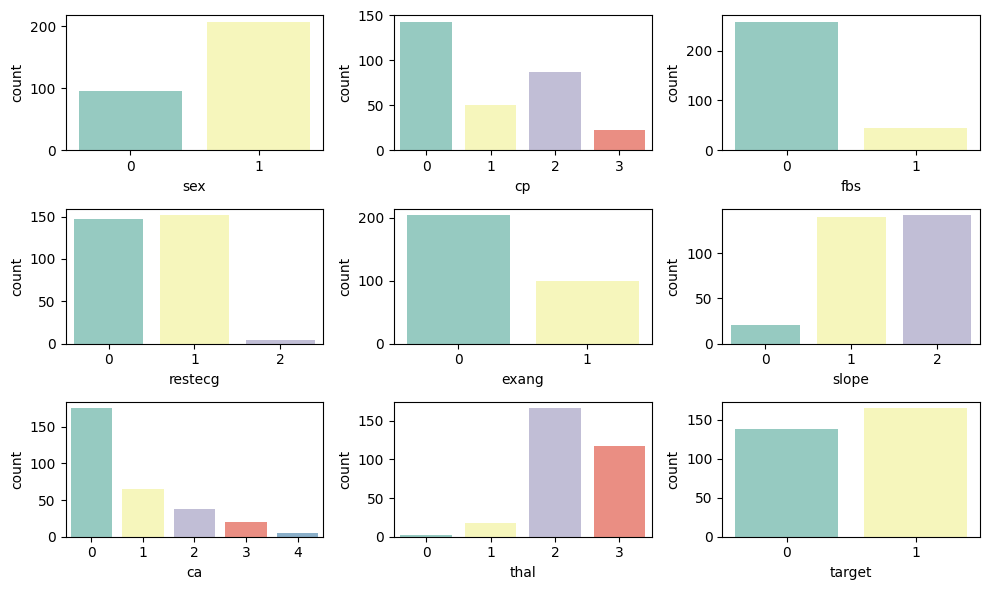

In [ ]:
# определимся с количеством строк и столбцов
nrows, ncols = 3, 3
# создадим счетчик для столбцов
col = 0

# создадим объекты fig и ax

fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (10, 6))

try:
  for i in range(nrows):
    for j in range(ncols):
      # для каждой комбинации i и j (координат подграфика) выведем столбчатую диаграмму Seaborn.
      sns.countplot(df_heart[categorical_list], x = categorical_list[col], ax = ax[i, j], palette='Set3')

      # обновим счетчик столбцов
      col += 1
except IndexError:
  print()

# выведем результат
finally:
  plt.tight_layout()

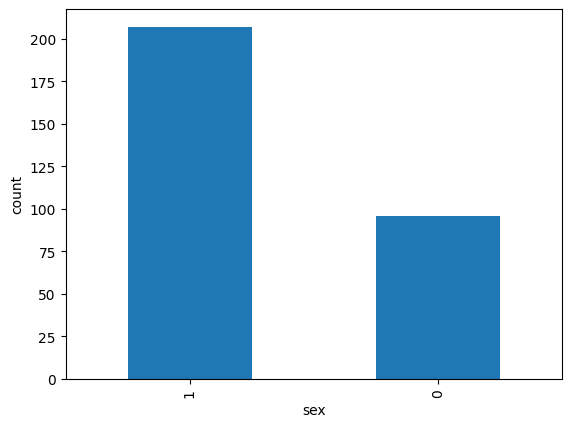

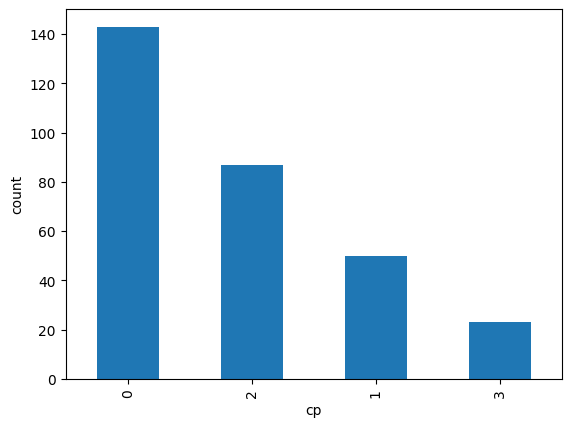

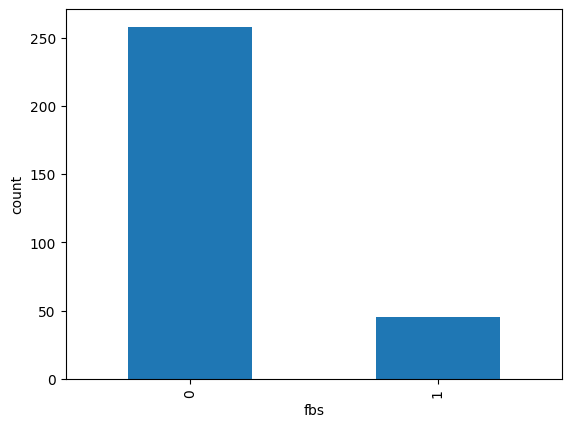

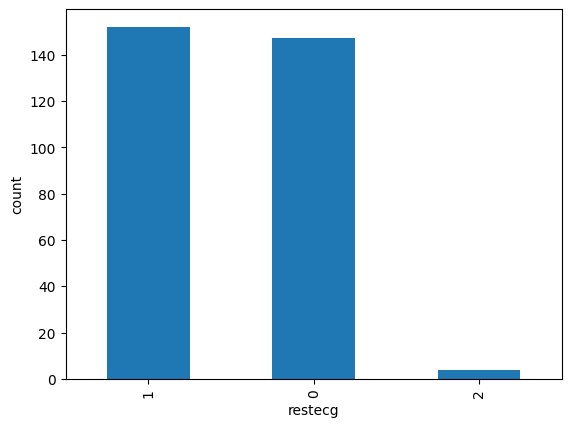

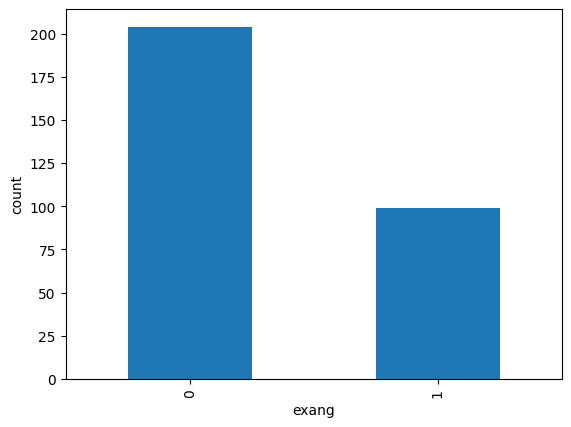

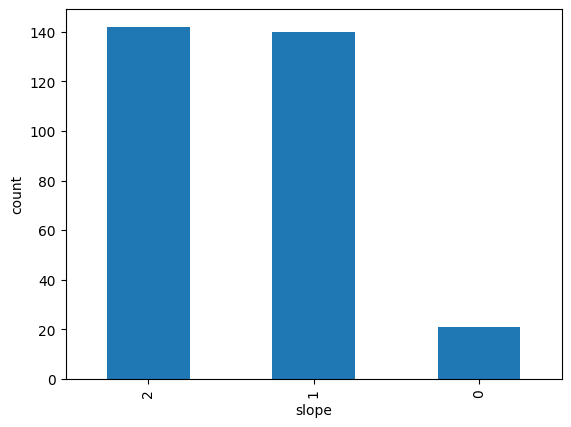

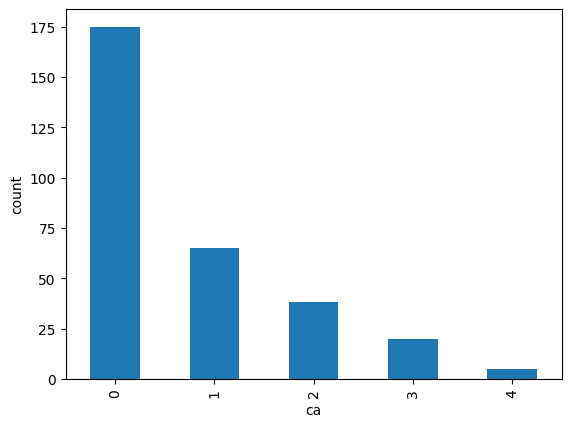

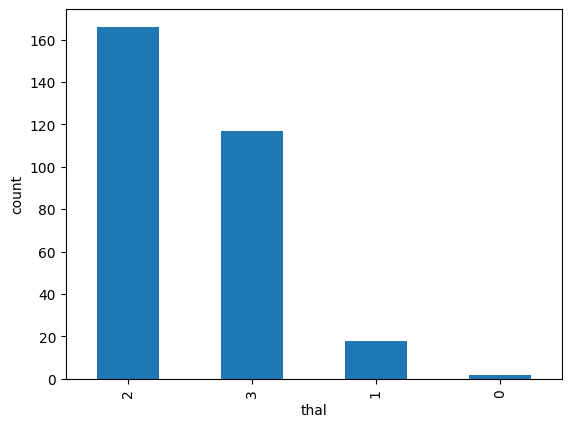

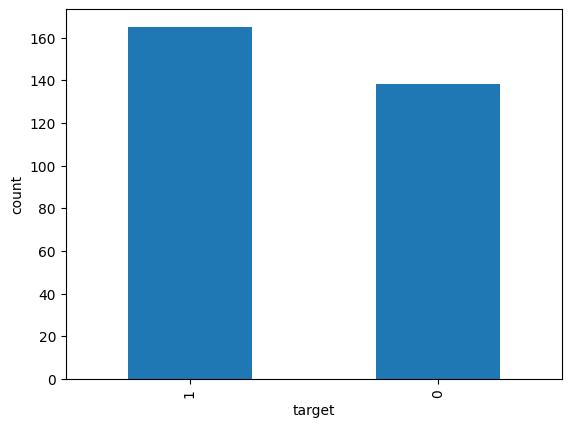

In [ ]:
# Другой вариант.
for i in categorical_list:
  df_heart[i].value_counts().plot(kind='bar', ylabel='count')
  plt.show()

# **Задание 2.**
1. Загрузите набор данных, подходящий для задачи классификации или регрессии. Вы можете использовать любой набор данных, предоставленный в библиотеке scikit-learn или другом доступном источнике данных.
2. Разделите данные на обучающую и тестовую выборки с помощью функции train_test_split из библиотеки scikit-learn.
3. Создайте модель машинного обучения, которую вы хотите использовать для предсказания на этом наборе данных. Например, можно использовать модель линейной регрессии или случайный лес для задачи регрессии, или модель логистической регрессии или случайный лес для задачи классификации.
4. Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке. Например, можно использовать метод cross_val_score из библиотеки scikit-learn с использованием метрики оценки, такой как точность (accuracy) или среднеквадратичная ошибка (mean squared error).
5. Проведите подбор гиперпараметров модели с помощью метода GridSearchCV из библиотеки scikit-learn. Этот метод позволяет перебирать различные значения гиперпараметров и выбирать наилучшие значения на основе кросс-валидации.
6. Обучите модель с использованием оптимальных гиперпараметров на обучающей выборке и оцени ее производительность на тестовой выборке.
7. Проведите анализ результатов и сделай выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного обучения.

### Загрузка библиотек

In [ ]:
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

In [ ]:
# Визуализация данных тренировочных и предсказанных
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    print(f'rmse test: {np.sqrt(mean_squared_error(test_true_values, test_pred_values))}')


    plt.figure(figsize=(18,10))

    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')

    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    plt.show()

In [ ]:
# Функция для уменьшения объема занимаемой памяти
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage of dataframe is {start_mem:.2f} MB')

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization is: {end_mem:.2f} MB')
    print(f'Decreased by {100 * (start_mem - end_mem) / start_mem:.1f}%')

    return df

### Загрузка данных

In [ ]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
df = pd.DataFrame(diabetes_data.data, columns = diabetes_data.feature_names)
df['measure'] = diabetes_data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# Переименую столбцы для удобства восприятия.
name_list = ['age', 'sex', 'bmi', 'bp', 'tc','ldl', 'hdl', 'tch', 'ltg','glu', 'measure']
df.columns = name_list
list(df.columns)

['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu', 'measure']

In [ ]:
# Уменьшим объем занимаемой памяти
df = reduce_mem_usage(df)

Memory usage of dataframe is 0.04 MB
Memory usage after optimization is: 0.02 MB
Decreased by 49.8%


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      442 non-null    float32
 1   sex      442 non-null    float32
 2   bmi      442 non-null    float32
 3   bp       442 non-null    float32
 4   tc       442 non-null    float32
 5   ldl      442 non-null    float32
 6   hdl      442 non-null    float32
 7   tch      442 non-null    float32
 8   ltg      442 non-null    float32
 9   glu      442 non-null    float32
 10  measure  442 non-null    float32
dtypes: float32(11)
memory usage: 19.1 KB


In [ ]:
#Проверка на наличие пропущенных значений
df.isna().sum()

,0
age,0
sex,0
bmi,0
bp,0
tc,0
ldl,0
hdl,0
tch,0
ltg,0
glu,0


In [ ]:
# Удалим дубликаты, если они есть
df = df.drop_duplicates()
len(df)

442

In [ ]:
df.loc[df['sex'] > 0, 'sex'] = 1
df.loc[df['sex'] < 0, 'sex'] = 0


In [ ]:
# # Приведение типов
df['sex'] = df['sex'].astype('object')
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,measure
0,0.038076,1.0,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0.0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,1.0,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,0.0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,0.0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      442 non-null    float32
 1   sex      442 non-null    object 
 2   bmi      442 non-null    float32
 3   bp       442 non-null    float32
 4   tc       442 non-null    float32
 5   ldl      442 non-null    float32
 6   hdl      442 non-null    float32
 7   tch      442 non-null    float32
 8   ltg      442 non-null    float32
 9   glu      442 non-null    float32
 10  measure  442 non-null    float32
dtypes: float32(10), object(1)
memory usage: 20.8+ KB


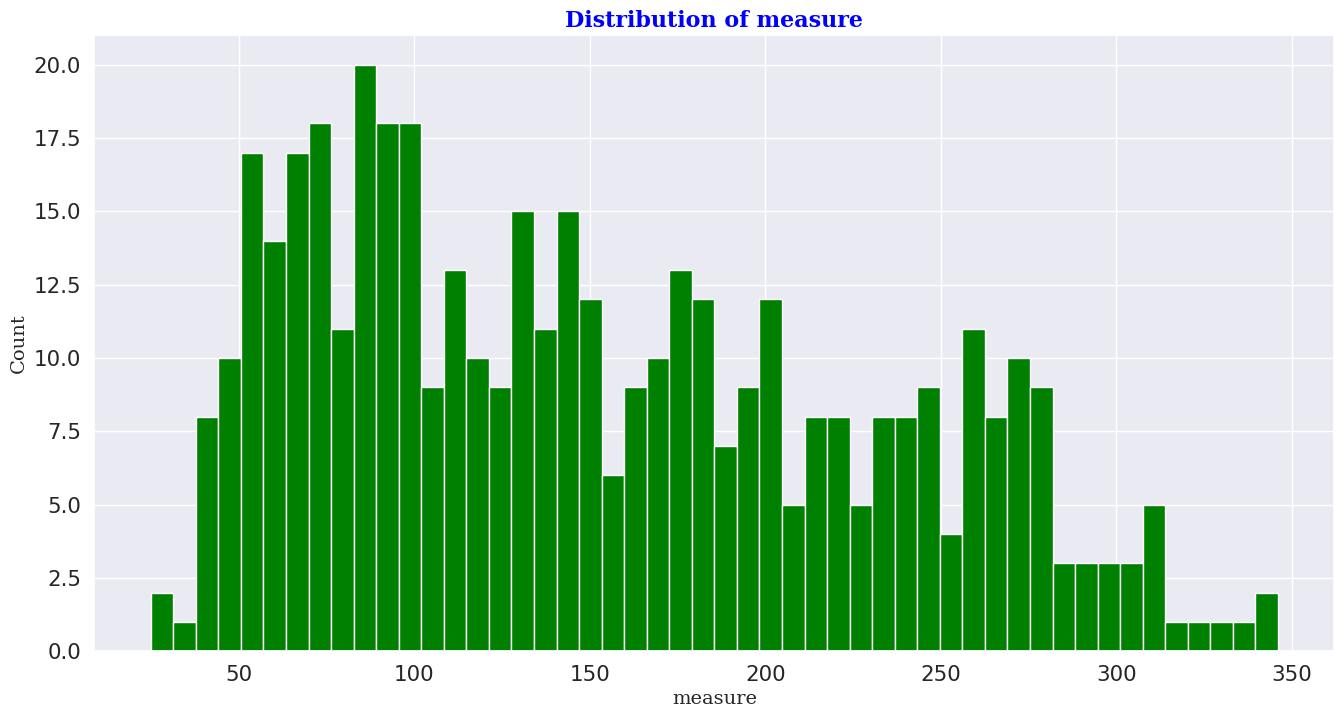

In [ ]:
# Обзор целевой переменной
plt.figure(figsize = (16, 8))
label_font = {
    "fontsize": 14,
    "family": "serif",
}
title_font = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "blue",
    "family": "serif"
}
df['measure'].hist(density=False, bins=50, color="green", ec="white")
plt.ylabel('Count', fontdict=label_font)
plt.xlabel('measure', fontdict=label_font)

plt.title('Distribution of measure', fontdict=title_font)
plt.show()

In [ ]:
# Обзор количественных переменных
df.describe()

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu,measure
count,442.000000,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,0.000000,1.348521e-10,0.000000,-1.348521e-10,1.348521e-10,-2.697043e-10,-2.697043e-10,2.697043e-10,-6.742607e-11,152.133484
std,0.047619,4.761905e-02,0.047619,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093002
min,-0.107226,-9.027530e-02,-0.112399,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639451e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-0.037299,-3.422907e-02,-0.036656,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,0.005383,-7.283766e-03,-0.005670,-4.320865e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077697e-03,140.500000
75%,0.038076,3.124802e-02,0.035644,2.835802e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243233e-02,2.791705e-02,211.500000
max,0.110727,1.705552e-01,0.132044,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


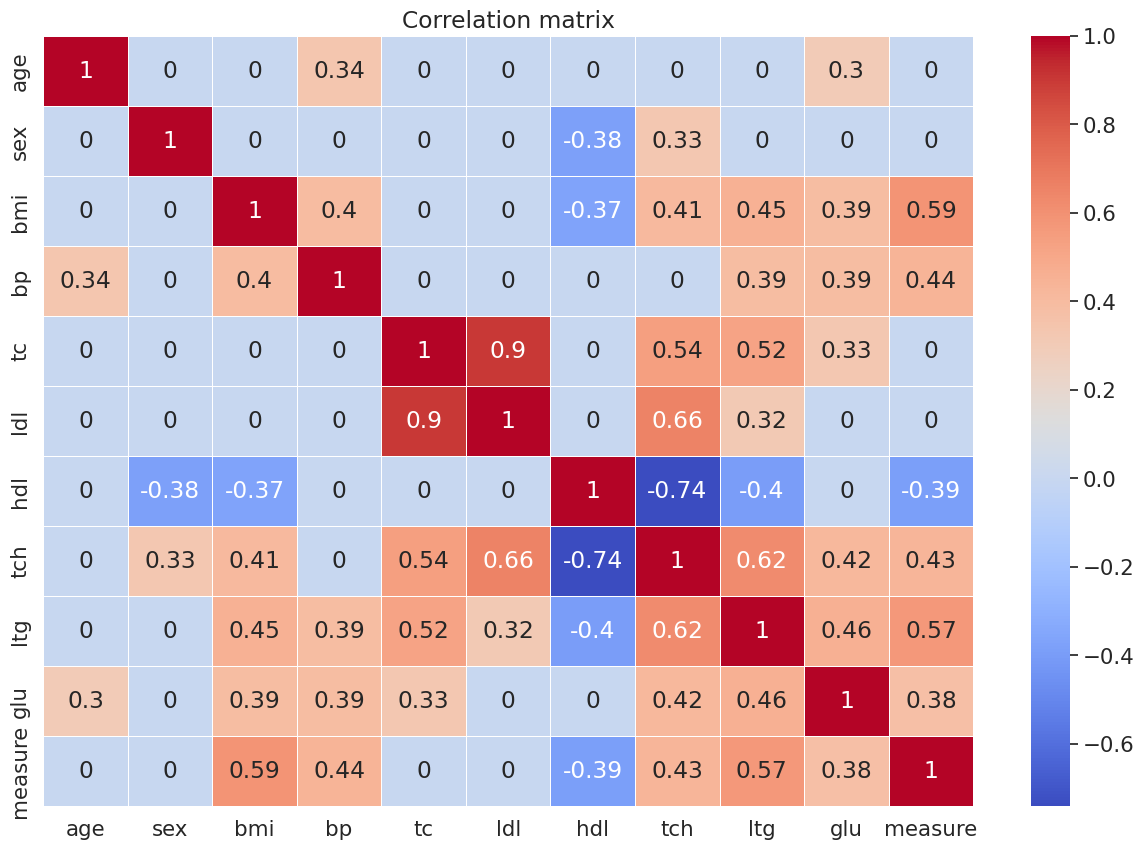

In [ ]:
#Создание матрицы корреляций для оценки линейных связей между переменными.
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

- отмечается высокая корреляция между ldl и tc, hdl и tch

In [ ]:
# Добавим новый признак - Индекс инсулинорезистентности
df['TyG'] = df['ltg']*df['glu']

### Подготовим данные для регрессионного анализа.

In [ ]:
X = df.drop(['measure'], axis=1)
y = df['measure']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True,)

RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

Train R2:	0.923
Test R2:	0.437
rmse test: 54.607842555253235


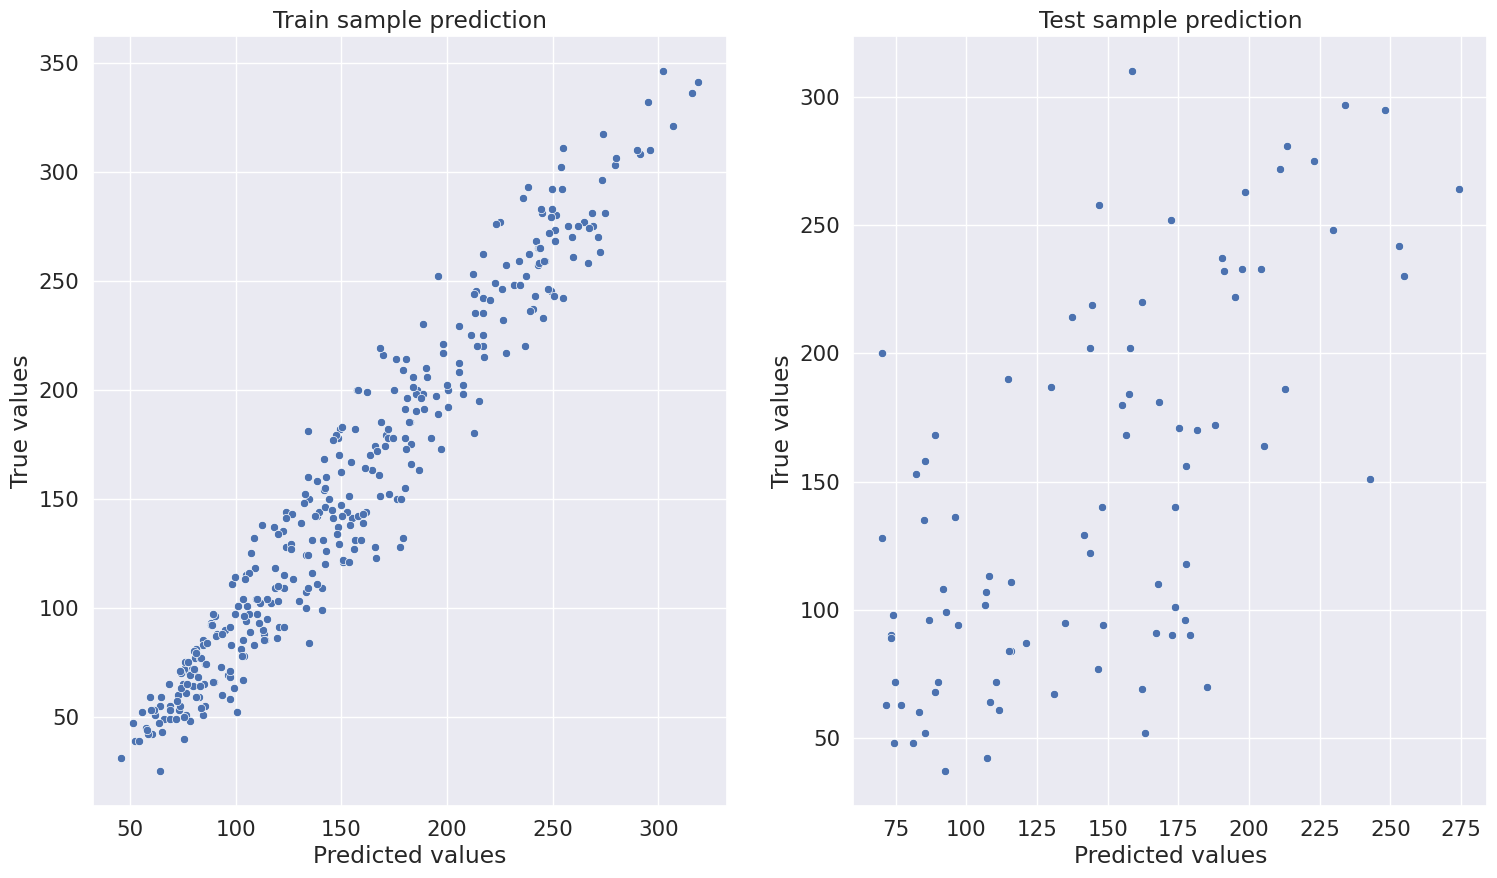

In [ ]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

Подбор гиперпараметров

In [ ]:
parameters = {'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [ ]:
grid = GridSearchCV(rf_model,param_grid=parameters,cv=3,scoring='r2')
model_grid = grid.fit(X,y)

In [ ]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best score is: 0.4737041984775157


Train R2:	0.85
Test R2:	0.483
rmse test: 52.341804882740256


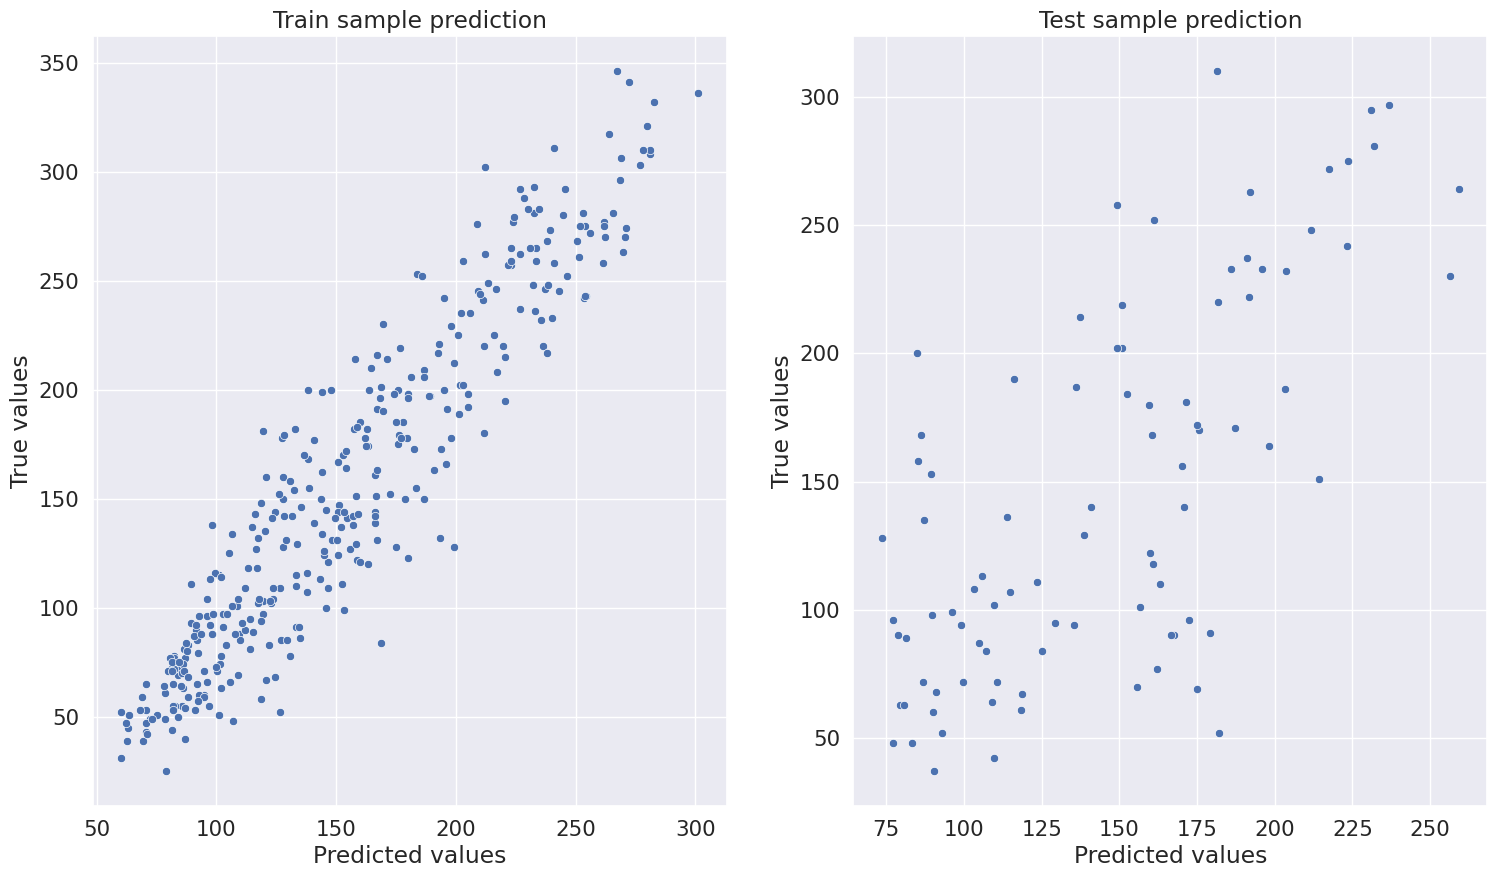

In [ ]:
rf_model_2 = RandomForestRegressor(max_depth=10, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, random_state=21)
rf_model_2.fit(X_train, y_train)
y_train_preds = rf_model_2.predict(X_train)
y_test_preds = rf_model_2.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

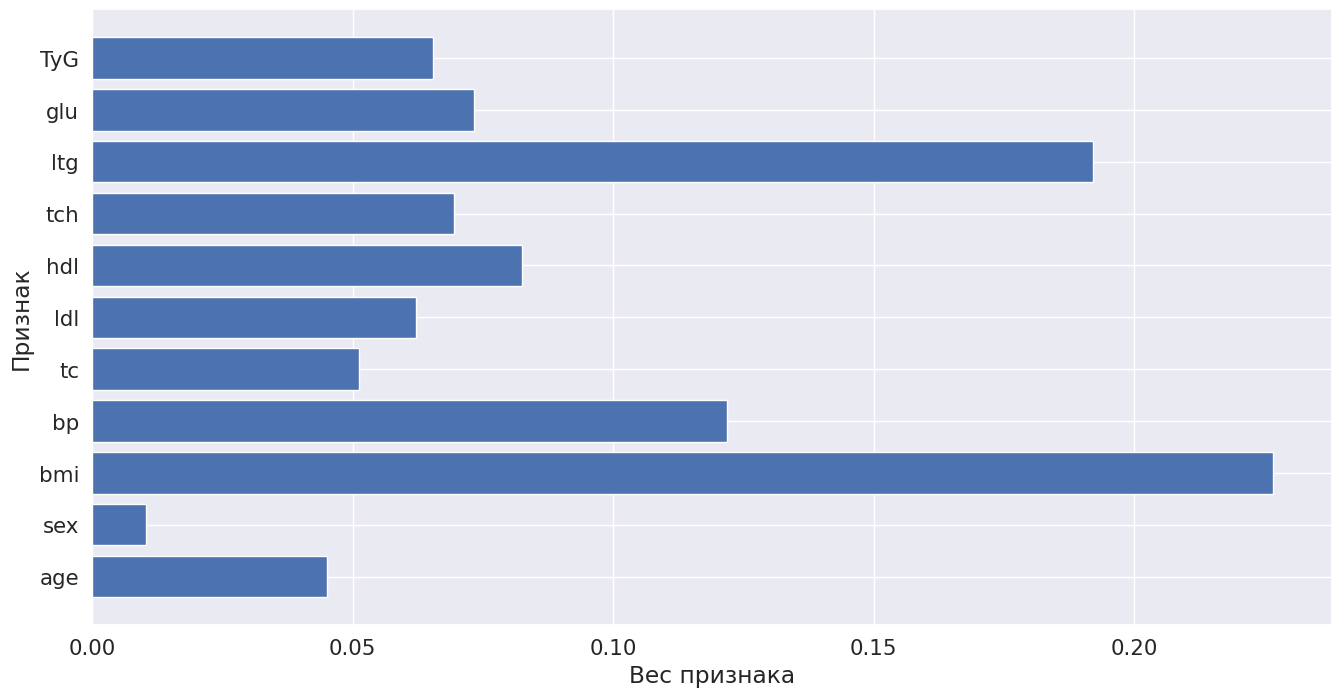

In [ ]:
# Визуализация важности признаков
plt.figure(figsize=(16,8))
plt.barh(X_train.columns.tolist(), rf_model_2.feature_importances_)
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()

In [ ]:
cv_score = cross_val_score(rf_model_2, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.3731114 , 0.44895181, 0.47771718])

### Выводы:
- Модель показала отличные результаты на тренировочных данных, но очень низкие на тестовых. Это свиделельствует о ее переобучении.
- Подбор гиперпараметров модели с помощью метода GridSearchCV несколько уменьшил переобучение модели, а также немного улучшились метрики на тестовых данных. Таким образом, подбор гиперпараметров модели оказывает положительное влияние на точность ее работы.
- также я пробовала удалять из датасета сильно скоррелированные признаки, однако это не изменяло значительно результат.

### Линейная регрессия.

Train R2:	0.528
Test R2:	0.453
rmse test: 53.853445987079816


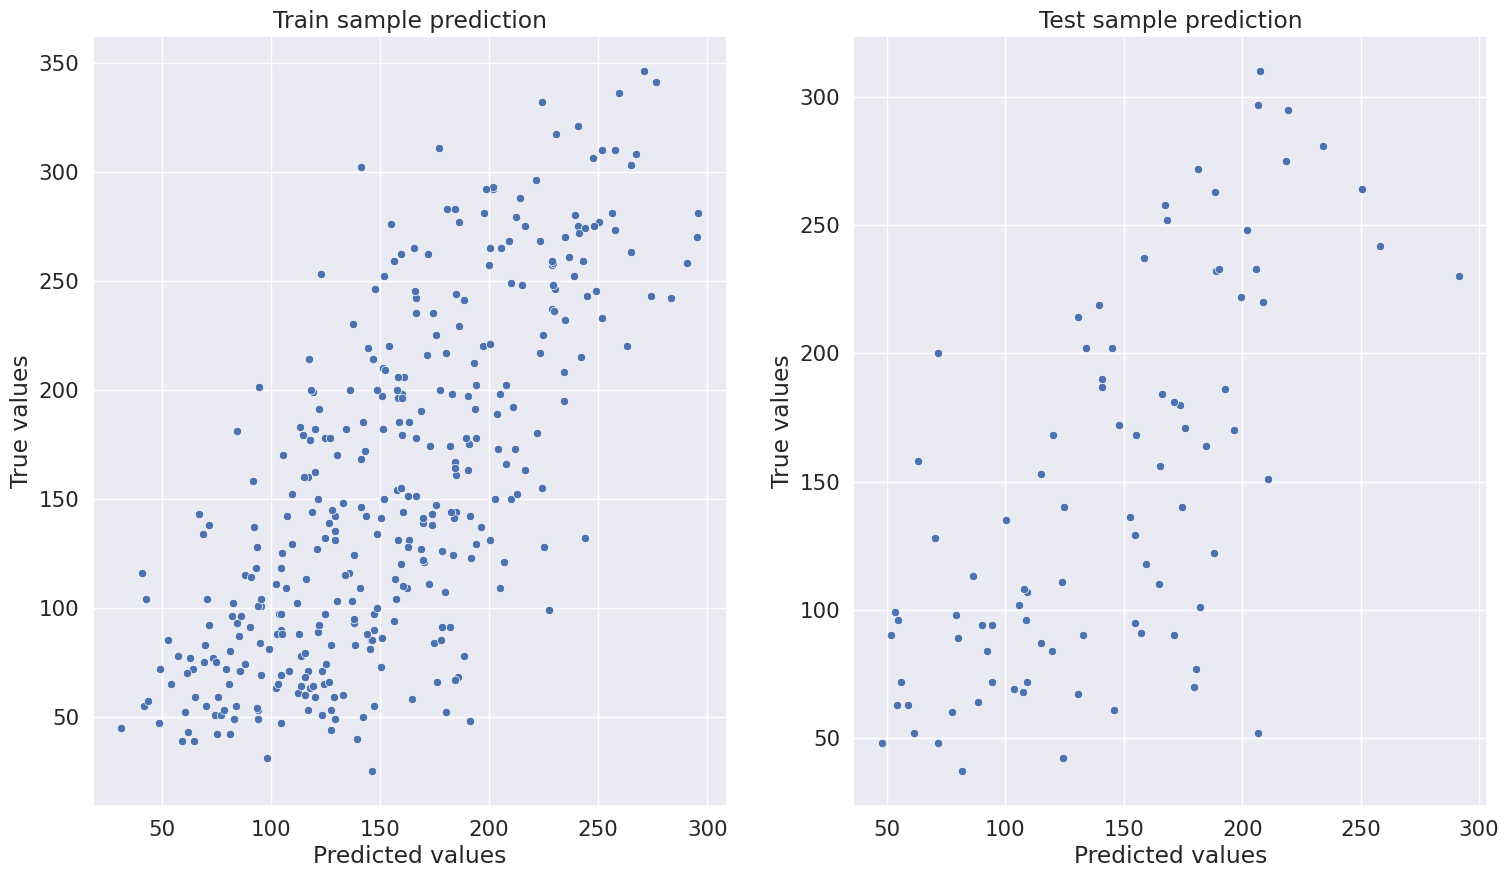

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True,)
regr = LinearRegression()

regr.fit(X_train1, y_train1)

y_train_preds1 = regr.predict(X_train1)
y_test_preds1 = regr.predict(X_test1)

evaluate_preds(y_train1, y_train_preds1, y_test1, y_test_preds1)

In [ ]:
cv_score = cross_val_score(regr, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.44117555, 0.51221158, 0.54222549])

- Простая линейная регрессия не переобучается и, несмотря на то, что метрики она показывает невысокие, однако, они лучше, чем у RF.

# **Задание 3.**
- Необходимо препроцессировать данные, выбрать только содержательные колонки; сделать описательную статистику нескольких параметров;
- Cформулировать гипотезу о взаимосвязи ваших параметров (например, смертность при раке зависит от пола) и проверить ее с помощью подходящего метода визуализации.
- Если сможете выбрать метод и рассчитать статистику вывода, это будет плюсом

Загрузка данных

In [ ]:
!tar -xzvf "/content/clinical.project-tcga-dlbc.2023-09-20 (1).tar.gz" -C "/content/"

clinical.tsv
family_history.tsv
exposure.tsv
pathology_detail.tsv
follow_up.tsv


In [ ]:
clinical_data = pd.read_csv ("/content/clinical.tsv", sep="\t")
exposure_data = pd.read_csv ("/content/exposure.tsv", sep="\t")
fam_history_data = pd.read_csv ("/content/family_history.tsv", sep="\t")
follow_up_data = pd.read_csv ("/content/follow_up.tsv", sep="\t")
pathology_data = pd.read_csv ("/content/pathology_detail.tsv", sep="\t")


In [ ]:
clinical_data.tail(3)

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
103,f978cb0f-d319-4c01-b4c5-23ae1403a106,TCGA-FF-8047,TCGA-DLBC,38,'--,'--,'--,'--,-13996,'--,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
104,fdecb74f-ac4e-46b1-b23a-5f7fde96ef9f,TCGA-GS-A9U3,TCGA-DLBC,77,'--,'--,'--,'--,-28474,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
105,fdecb74f-ac4e-46b1-b23a-5f7fde96ef9f,TCGA-GS-A9U3,TCGA-DLBC,77,'--,'--,'--,'--,-28474,'--,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"


In [ ]:
exposure_data.head(3)

,case_id,case_submitter_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
1,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
2,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [ ]:
fam_history_data.head(3)

,case_id,case_submitter_id,project_id,relationship_age_at_diagnosis,relationship_gender,relationship_primary_diagnosis,relationship_type,relative_with_cancer_history,relatives_with_cancer_history_count


In [ ]:
follow_up_data.head(3)

,case_id,case_submitter_id,project_id,adverse_event,adverse_event_grade,aids_risk_factors,barretts_esophagus_goblet_cells_present,bmi,body_surface_area,cause_of_response,...,second_gene_symbol,specialized_molecular_test,test_analyte_type,test_result,test_units,test_value,transcript,variant_origin,variant_type,zygosity


In [ ]:
pathology_data.head(3)

,case_id,case_submitter_id,project_id,diagnosis_id,diagnosis_submitter_id,additional_pathology_findings,anaplasia_present,anaplasia_present_type,bone_marrow_malignant_cells,breslow_thickness,...,rhabdoid_percent,rhabdoid_present,sarcomatoid_percent,sarcomatoid_present,size_extraocular_nodule,transglottic_extension,tumor_largest_dimension_diameter,tumor_thickness,vascular_invasion_present,vascular_invasion_type


In [ ]:
# Удаление полностью пустых колонок.

def new_data(data):
  col_list = []
  for col in data.columns:
    temp = data[f'{col}'].values
    if "'--" in temp:
      if sum(data[f'{col}'] != "'--") > 0:
        col_list.append(col)
    else:
      col_list.append(col)
  dis_new = data[col_list]
  return dis_new

In [ ]:
disease_new = new_data(clinical_data)
disease_new.head(3)

,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,-22454,248,not hispanic or latino,female,asian,Dead,...,no,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,-22454,248,not hispanic or latino,female,asian,Dead,...,no,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,no,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,-27025,58,not hispanic or latino,male,asian,Dead,...,no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,no,"Radiation Therapy, NOS"


In [ ]:
disease_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case_id                           106 non-null    object
 1   case_submitter_id                 106 non-null    object
 2   project_id                        106 non-null    object
 3   age_at_index                      106 non-null    object
 4   days_to_birth                     106 non-null    object
 5   days_to_death                     106 non-null    object
 6   ethnicity                         106 non-null    object
 7   gender                            106 non-null    object
 8   race                              106 non-null    object
 9   vital_status                      106 non-null    object
 10  year_of_birth                     106 non-null    object
 11  year_of_death                     106 non-null    object
 12  age_at_diagnosis      

In [ ]:
disease_new.columns

Index(['case_id', 'case_submitter_id', 'project_id', 'age_at_index',
       'days_to_birth', 'days_to_death', 'ethnicity', 'gender', 'race',
       'vital_status', 'year_of_birth', 'year_of_death', 'age_at_diagnosis',
       'ann_arbor_b_symptoms', 'ann_arbor_clinical_stage',
       'ann_arbor_extranodal_involvement', 'classification_of_tumor',
       'days_to_diagnosis', 'days_to_last_follow_up', 'icd_10_code',
       'last_known_disease_status', 'morphology', 'primary_diagnosis',
       'prior_malignancy', 'prior_treatment', 'progression_or_recurrence',
       'site_of_resection_or_biopsy', 'synchronous_malignancy',
       'tissue_or_organ_of_origin', 'tumor_grade', 'year_of_diagnosis',
       'treatment_or_therapy', 'treatment_type'],
      dtype='object')

In [ ]:
# Список количественных переменных
numeric_list = ['days_to_birth', 'age_at_diagnosis', 'year_of_diagnosis', 'age_at_index', 'days_to_death', 'days_to_last_follow_up']

In [ ]:
# Удалим столбцы, дублирующийся по смыслу с 'days_to_birth', 'days_to_death', полностью '0'
disease_new = disease_new.drop(['year_of_birth', 'year_of_death', 'days_to_diagnosis'], axis=1);

In [ ]:
cat_features = [i for i in disease_new.drop(['case_id', 'case_submitter_id', 'project_id'], axis=1).columns if i not in numeric_list]

In [ ]:
# Замена "'--" в количественных переменных на Nan
for col in disease_new.columns:
  disease_new.loc[disease_new[f'{col}'] == "'--", [f'{col}']] = np.nan
disease_new.head(5)

,case_id,case_submitter_id,project_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,-22454,248,not hispanic or latino,female,asian,Dead,...,no,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,-22454,248,not hispanic or latino,female,asian,Dead,...,no,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,no,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,-27025,58,not hispanic or latino,male,asian,Dead,...,no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,no,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,-27025,58,not hispanic or latino,male,asian,Dead,...,no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,yes,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,-10075,391,hispanic or latino,female,white,Dead,...,no,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,yes,"Pharmaceutical Therapy, NOS"


In [ ]:
# Приведение типов данных
for i in numeric_list:
  disease_new[i] = disease_new[i].astype('float32')

In [ ]:
# Перевела все колонки с днями в года
disease_new['days_to_birth'] = disease_new['days_to_birth']/-365.25
disease_new['age_at_diagnosis'] = disease_new['age_at_diagnosis']/365.25
disease_new['days_to_death'] = disease_new['days_to_death']/365.25
disease_new['days_to_last_follow_up'] = disease_new['days_to_last_follow_up']/365.25
disease_new.rename(columns={'days_to_last_follow_up': 'years_to_last_follow_up'}, inplace=True)
disease_new = disease_new.drop('days_to_birth', axis=1);

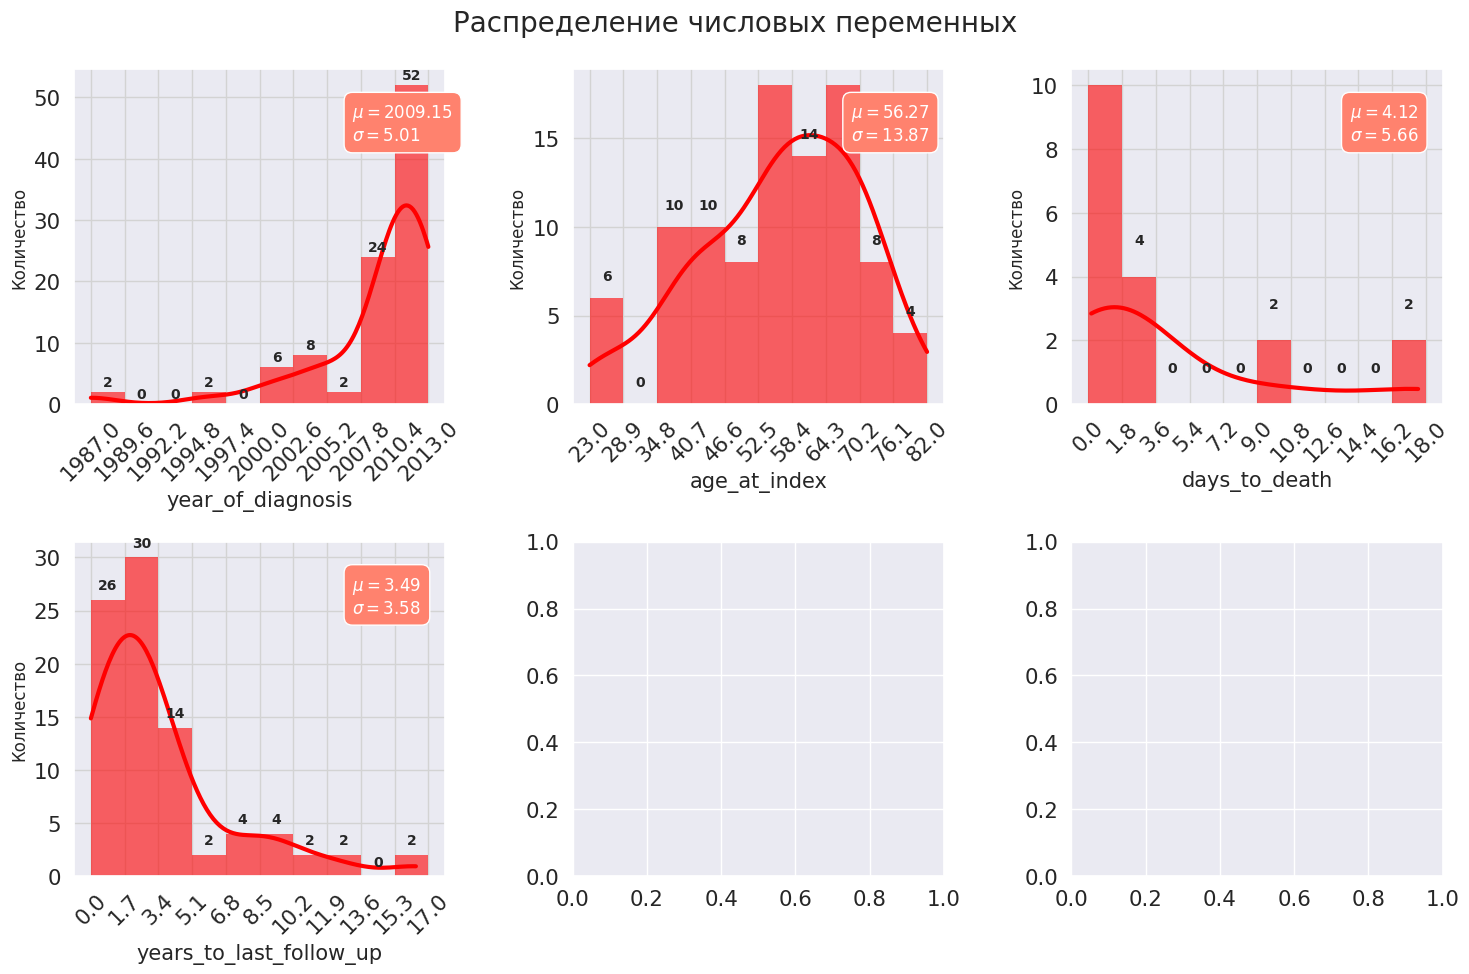

In [ ]:
numeric_list = numeric_list[1:-1]+['years_to_last_follow_up']
df_continuous = disease_new[numeric_list]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

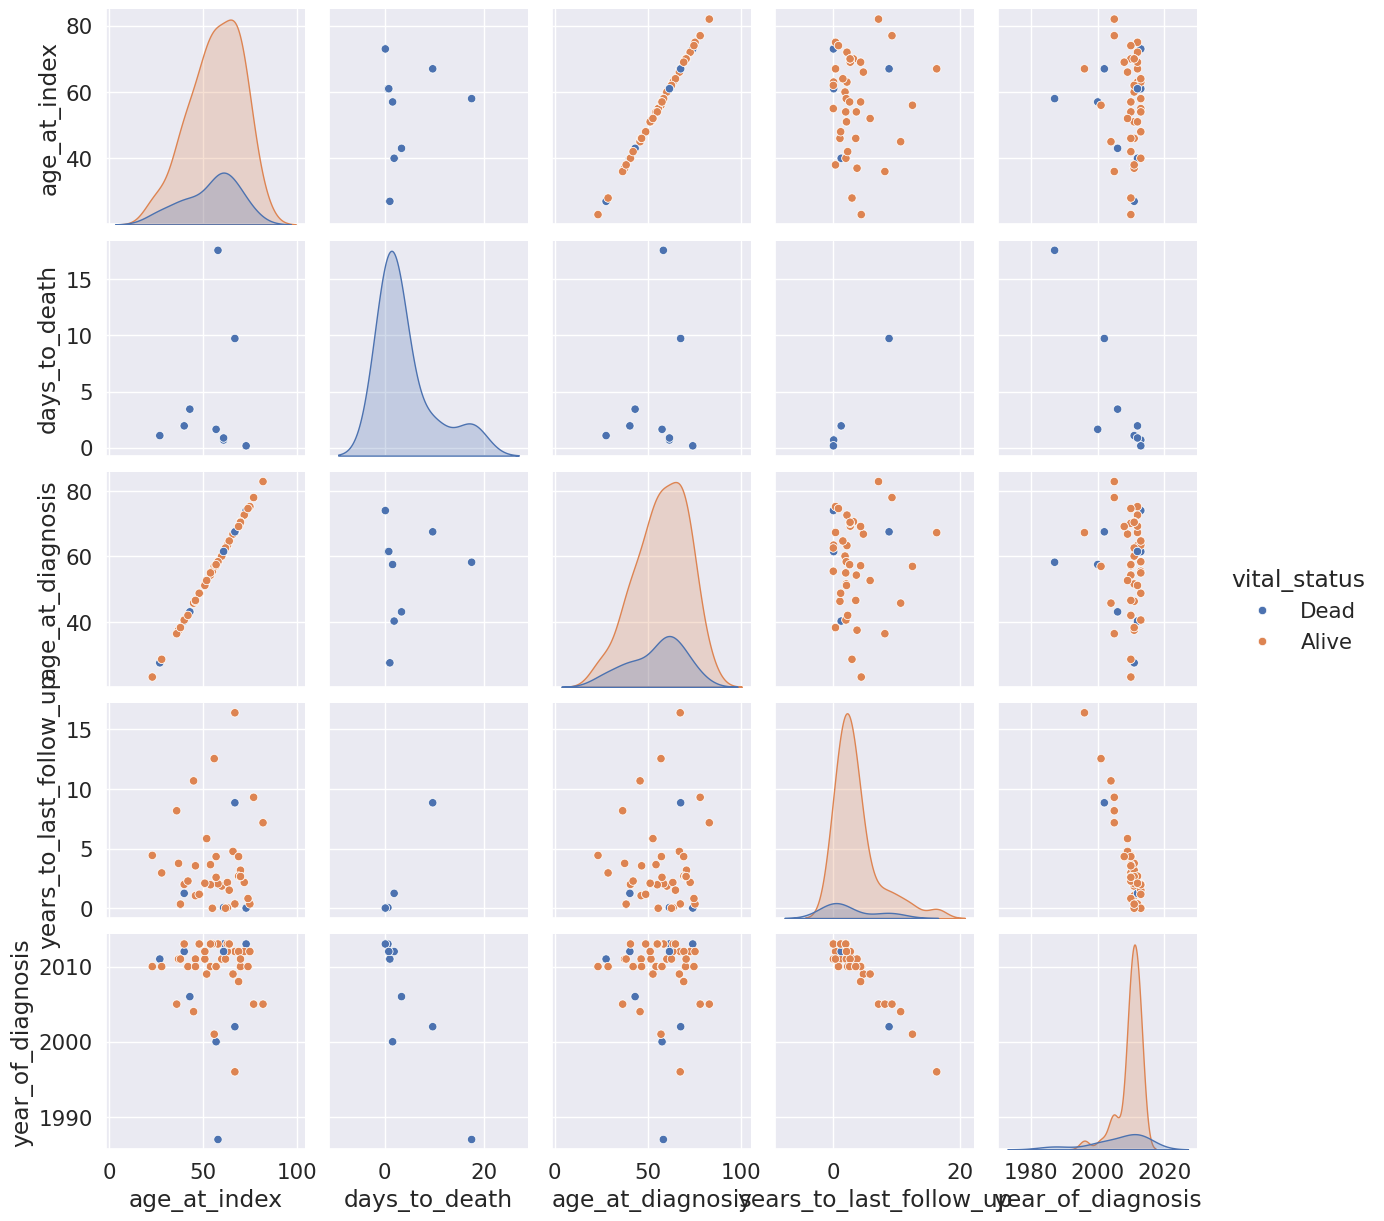

In [ ]:
sns.pairplot(disease_new, hue="vital_status");

### Категориальные переменные

In [ ]:
import scipy.stats as stats

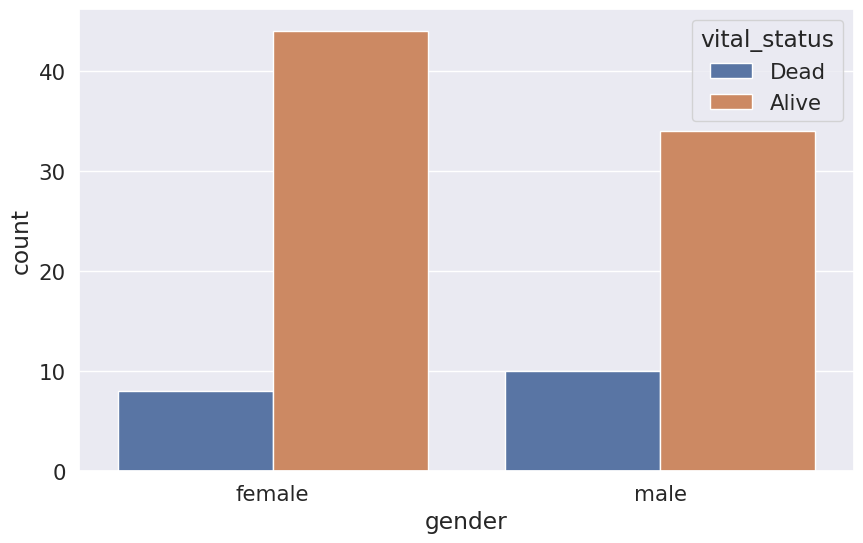

In [ ]:
# Визуализируем график, отражающий количество выживших в зависимости от пола
plt.figure(figsize=(10, 6))
sns.countplot(disease_new, x="gender", hue='vital_status');

- визуально уровень выживаемости среди женщин выше, чем среди мужчин.

Корреляция между категориальными переменными обычно строятся на основании таблиц сопряжённости. Попробуем также вычислить коэффициент  χ2.\
Н0- уровень смертности среди женщин и среди мужчин не отличается.

In [ ]:
pd.crosstab(disease_new['gender'], disease_new['vital_status'])

vital_status,Alive,Dead
gender,,
female,44,8
male,34,10


In [ ]:
stats.chi2_contingency(pd.crosstab(disease_new['gender'], disease_new['vital_status']))

Chi2ContingencyResult(statistic=0.4303388918773534, pvalue=0.5118227060154208, dof=1, expected_freq=array([[42.25,  9.75],
       [35.75,  8.25]]))

- pvalue=0.5118227060154208, следовательно, мы не отвергаем нулевую гипотезу, а значит выживаемость среди женщин и мужчин не отличается.

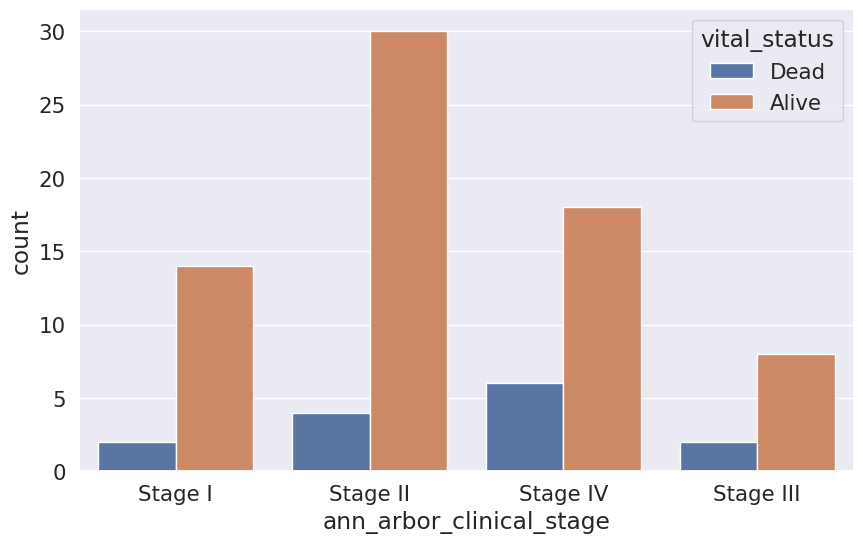

In [ ]:
# Визуализируем график, отражающий количество выживших в зависимости от стадии рака
plt.figure(figsize=(10, 6))
sns.countplot(disease_new, x="ann_arbor_clinical_stage", hue='vital_status');

- визуально максимальная выживаемость выявляется при 2 стадии рака

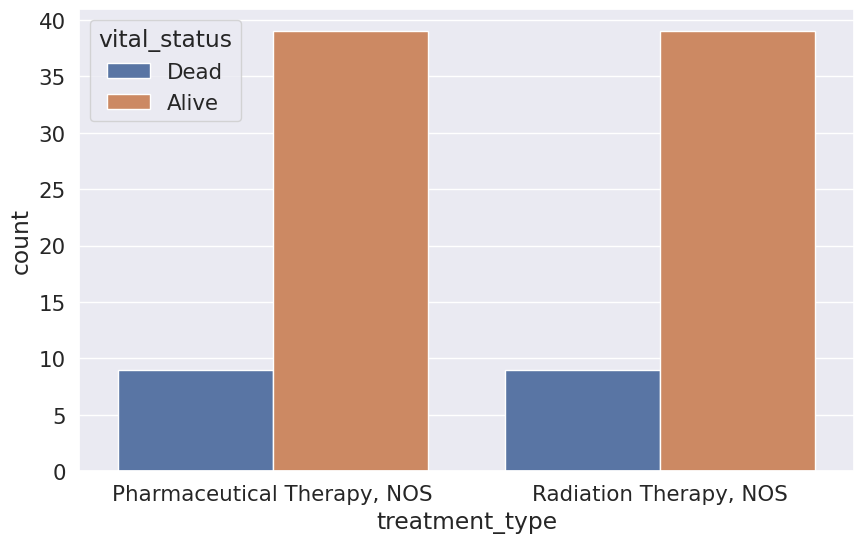

In [ ]:
# Визуализируем график, отражающий количество выживших в зависимости от терапии
plt.figure(figsize=(10, 6))
sns.countplot(disease_new, x="treatment_type", hue='vital_status');

- выживаемость в обеих группах рприблизительно равна